In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'nfile' is the DataFrame from the combined .txt files
# Example data structure
# nfile = pd.read_csv("combined_output.csv")

# Define intervals for 'Peak Field on Sample [mT]'
intervals = [
    {"center": 20, "tolerance": 3},
    {"center": 30, "tolerance": 3},
    {"center": 40, "tolerance": 5},
    {"center": 50, "tolerance": 5}
]

results = []

# Calculate mean and standard deviation for each interval
for interval in intervals:
    lower_bound = interval["center"] - interval["tolerance"]
    upper_bound = interval["center"] + interval["tolerance"]
    
    # Filter data within the interval
    filtered_data = nfile[
        (nfile["Peak Field on Sample [mT]"] >= lower_bound) & 
        (nfile["Peak Field on Sample [mT]"] <= upper_bound)
    ]
    
    # Calculate mean and standard deviation
    mean_resistance = filtered_data["Surface Resistance [nOhm]"].mean()
    std_resistance = filtered_data["Surface Resistance [nOhm]"].std()
    
    # Append results
    results.append({
        "Interval": f"{interval['center']}±{interval['tolerance']}",
        "Mean Resistance (nOhm)": mean_resistance,
        "Std Resistance (nOhm)": std_resistance
    })

# Create a new DataFrame for results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv("resistance_analysis.csv", index=False)

# Print the results
print(results_df)

# Plot the results
plt.errorbar(
    results_df["Interval"],
    results_df["Mean Resistance (nOhm)"],
    yerr=results_df["Std Resistance (nOhm)"],
    fmt='o',
    capsize=5,
    label="Surface Resistance"
)

plt.title("Surface Resistance Analysis")
plt.xlabel("Peak Field Interval [mT]")
plt.ylabel("Surface Resistance [nOhm]")
plt.grid(True)
plt.legend()
plt.savefig("resistance_analysis_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
import glob, os

TestPath=r"D:\PhD\QPR Data\2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS"

pattern = os.path.join(TestPath, "*MHz*.txt")
matching_files = glob.glob(pattern)

for file in matching_files:
    print(file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21510 entries, 0 to 21509
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date_Time                  21510 non-null  datetime64[ns]
 1   Set Temp [K]               21510 non-null  float64       
 2   Set Freq [Hz]              21510 non-null  float64       
 3   Duty Cycle [%]             9058 non-null   float64       
 4   Pulse Period [ms]          21510 non-null  float64       
 5   P_forw (giga)              0 non-null      float64       
 6   P_refl (giga)              0 non-null      float64       
 7   P_trans (giga)             0 non-null      float64       
 8   CW Power (Tek)             21510 non-null  float64       
 9   Pulse Power (Tek)          21510 non-null  float64       
 10  Peak Power (Tek)           21510 non-null  float64       
 11  DC meas [%] (Tek)          21510 non-null  float64       
 12  P_tr

d:\PhD\QPR Data Analysis\funclib\importf.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nfile=pd.concat(nfilelist, ignore_index=True)


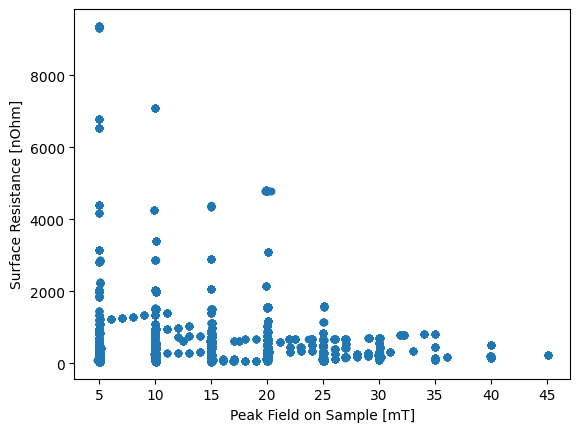

In [ ]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funclib.importf import *

# File path
Test1 = HandleTest(r"D:\PhD\QPR Data\2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS")
Test1Data = Test1.LoadData(pattern="*aMHz*.txt")

pd.set_option('display.max_rows', 100)
print(Test1Data.info())


#print(nfile["Surface Resistance [nOhm]"])
#ax = nfile.plot.scatter(x="Peak Field on Sample [mT]", y="Surface Resistance [nOhm]")

# Save the plot as a vector-based PDF
#plt.savefig("scatter_plot.pdf", format="pdf", bbox_inches="tight")

Test1Data.plot.scatter(x="Peak Field on Sample [mT]", y="Surface Resistance [nOhm]")
plt.show()
